In [1]:
# Librairies
import pandas as pd
import numpy as np
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV, cross_val_score,
    RandomizedSearchCV, cross_validate,
    StratifiedKFold
)
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

### Importation des données

In [2]:
data_path = r'C:\Users\nmako\OneDrive\Documents\Data-Science-Projects-Repository\Machine Learning TP\Application-ML-Detection-Defauts-Paiements-Credits-Bancaires\data\raw\credit_card_default.csv'
data = pd.read_csv(data_path)
df = data.copy()


### Analyses Exploratoires des données (EDA)


L'analyse exploratoire des données est une étape essentielle, il permet de comprendre les  données, de mettre en évidence des tendances, des relations et des anomalies, et de préparer les données pour la modélisation.
Tools : Sweetviz and pandas-profiling

In [8]:
#### Data Profiling
#profile = ProfileReport(df, title="Credit Card Default Data Profiling Report", explorative=True)
#profile.to_file("credit_card_default_data_profiling_report.html")       

In [4]:
df

,id,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High school,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High school,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High school,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Convertir les colonnes 'sex', 'education', 'default_payment_next_month' et 'marriage' en variables catégorielles
categorical_columns = ["sex", "marriage", "education", "default_payment_next_month"]
df[categorical_columns] = df[categorical_columns].astype("category")

In [9]:
# Convertir les colonnes payment_status en variables ordinales
payment_status = {
        -2: "Unknown",
        -1: "Payed duly",
        0: "Unknown",
        1: "Payment delayed 1 month",
        2: "Payment delayed 2 months",
        3: "Payment delayed 3 months",
        4: "Payment delayed 4 months",
        5: "Payment delayed 5 months",
        6: "Payment delayed 6 months",
        7: "Payment delayed 7 months",
        8: "Payment delayed 8 months",
        9: "Payment delayed >= 9 months",
    }

payment_order = list(payment_status.keys())
payment_categories = pd.CategoricalDtype(categories=payment_order, ordered=True)
payment_columns = [
    "payment_status_sep",
    "payment_status_aug",
    "payment_status_jul",
    "payment_status_jun",
    "payment_status_may",
    "payment_status_apr",
]
df[payment_columns] = df[payment_columns].astype(payment_categories)

In [15]:
df

,id,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High school,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High school,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High school,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [12]:
df.describe(include=['category']).T

,count,unique,top,freq
sex,30000,2,Female,18112
education,30000,4,University,14030
marriage,30000,3,Single,15964
payment_status_sep,30000,11,0,14737
payment_status_aug,30000,11,0,15730
payment_status_jul,30000,11,0,15764
payment_status_jun,30000,11,0,16455
payment_status_may,30000,10,0,16947
payment_status_apr,30000,10,0,16286
default_payment_next_month,30000,2,0,23364


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



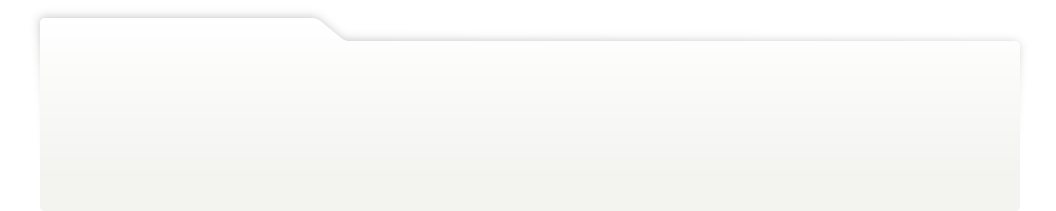
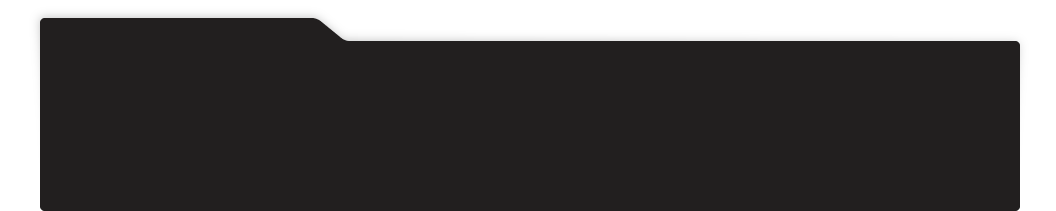
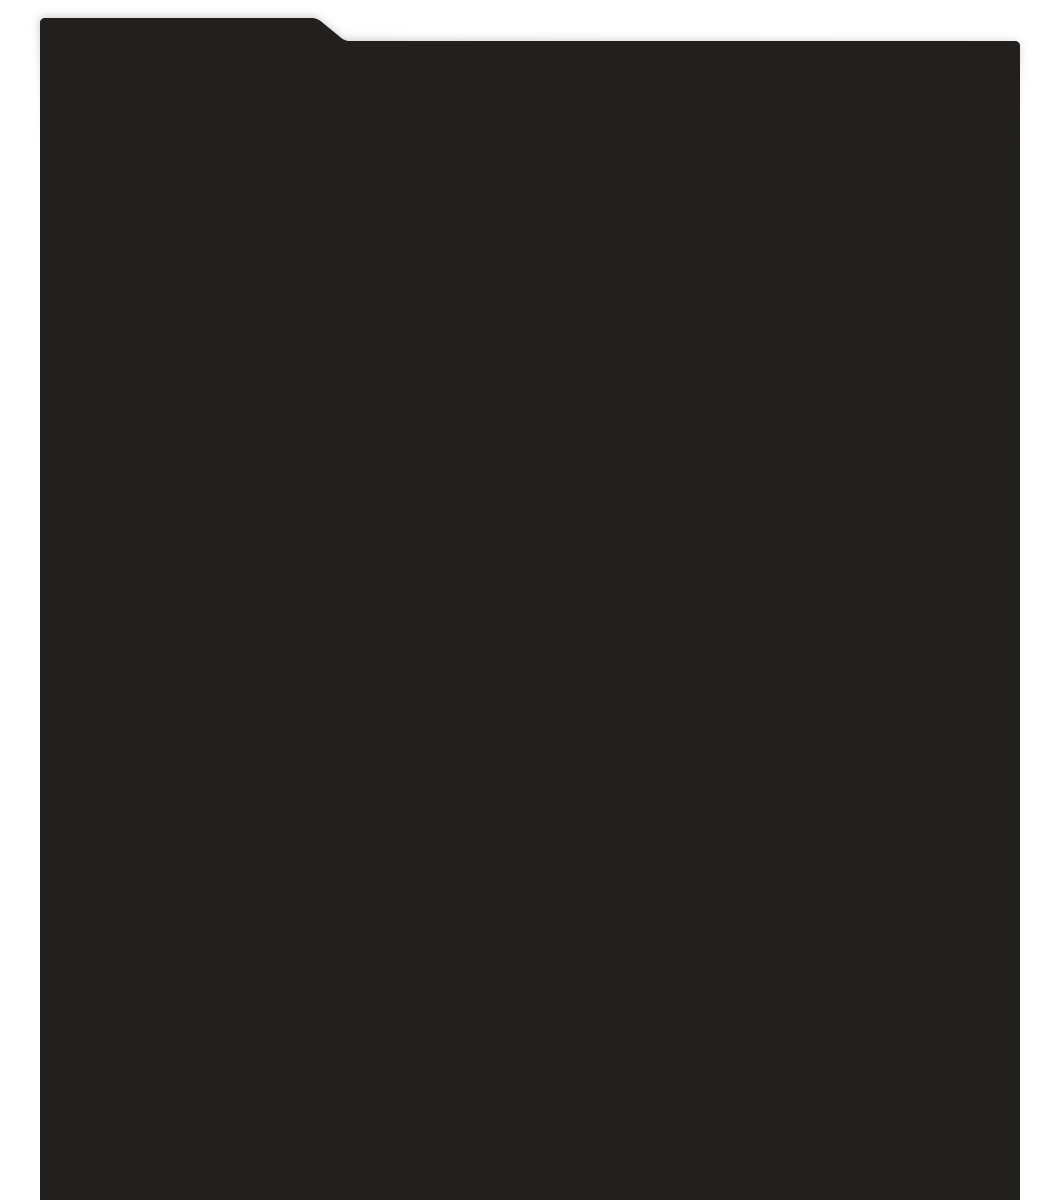
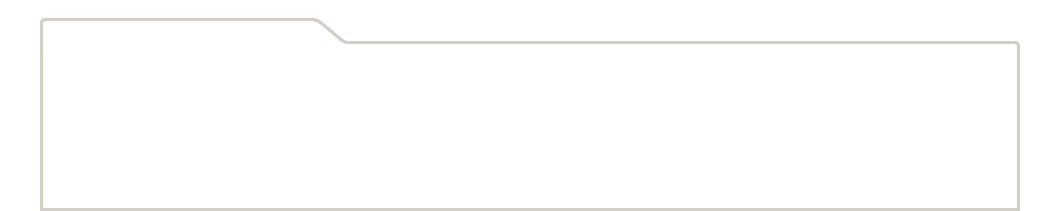
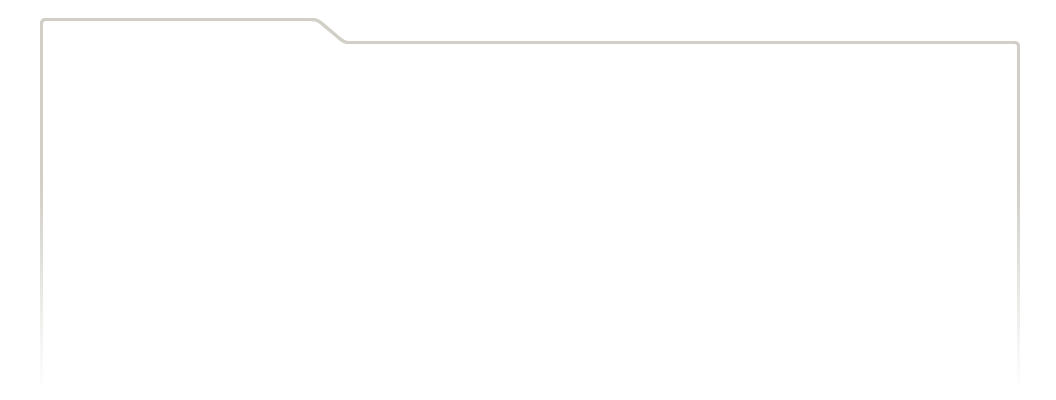
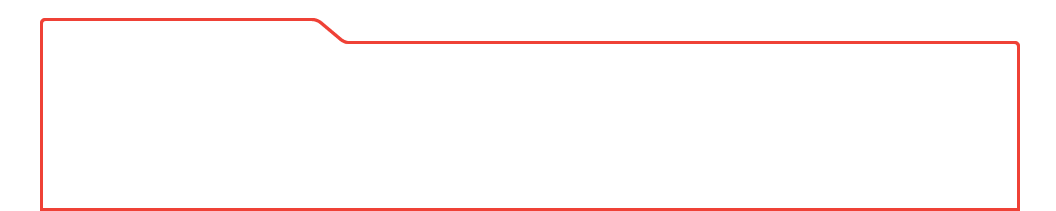
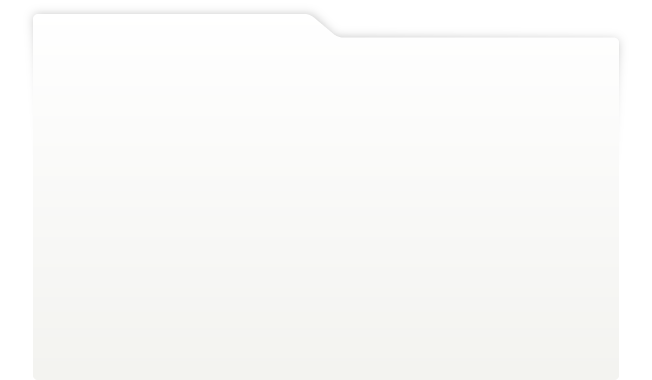
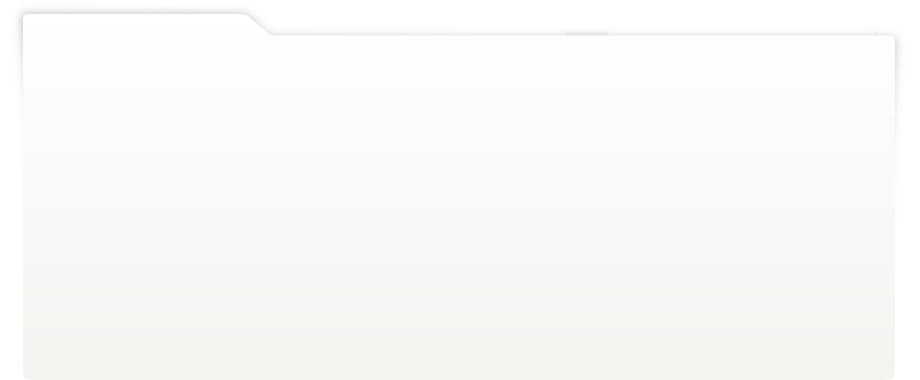
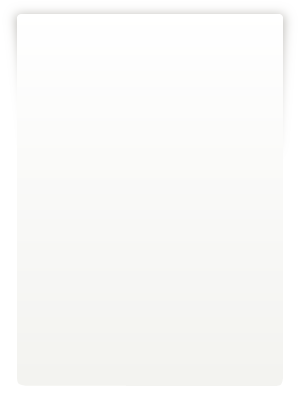
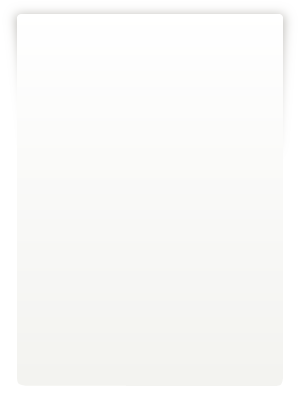
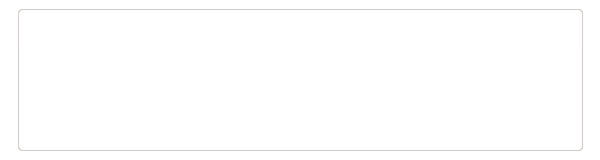
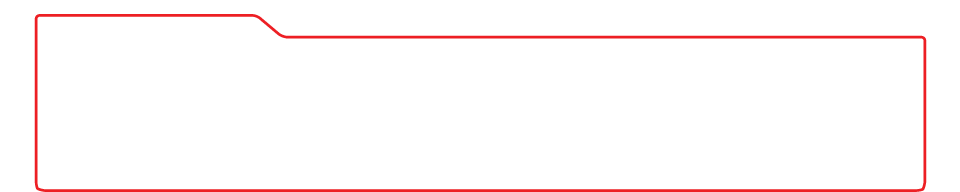
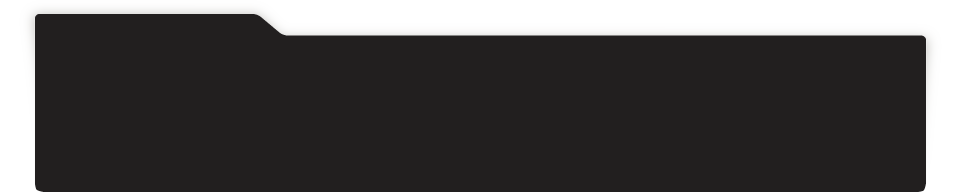
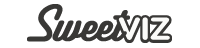
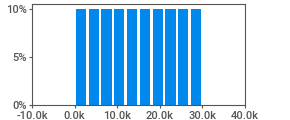
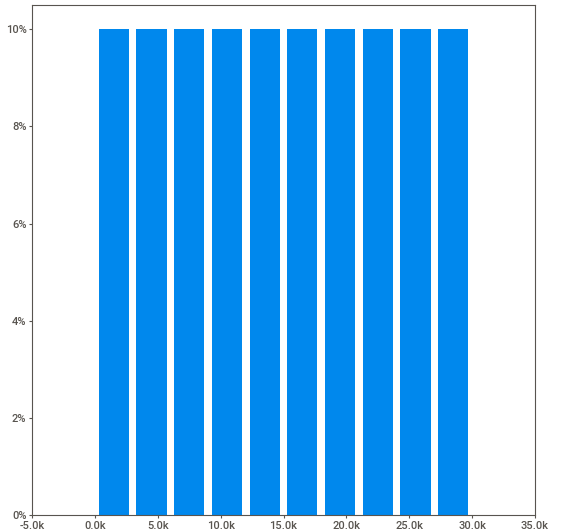
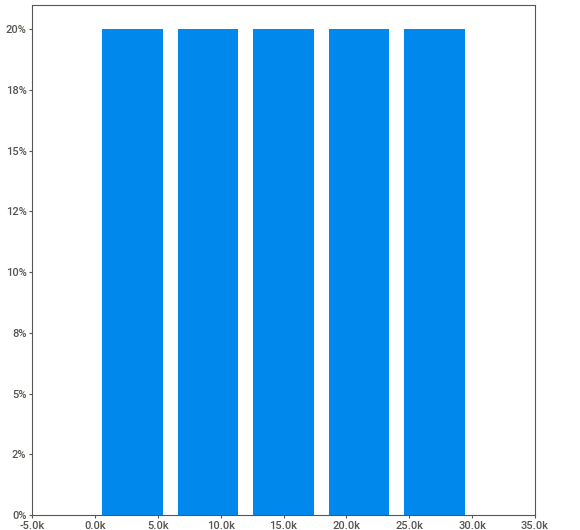
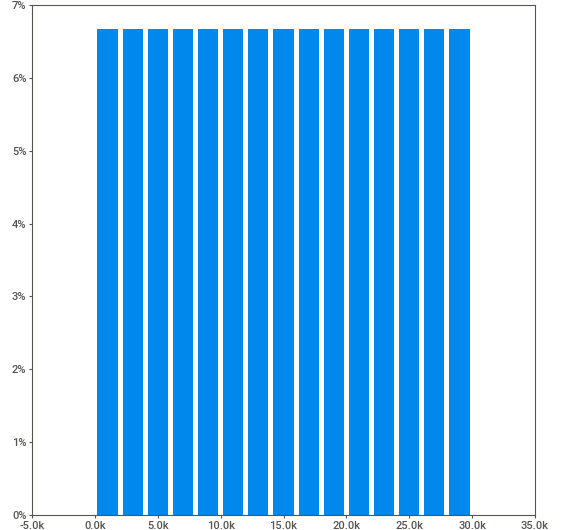
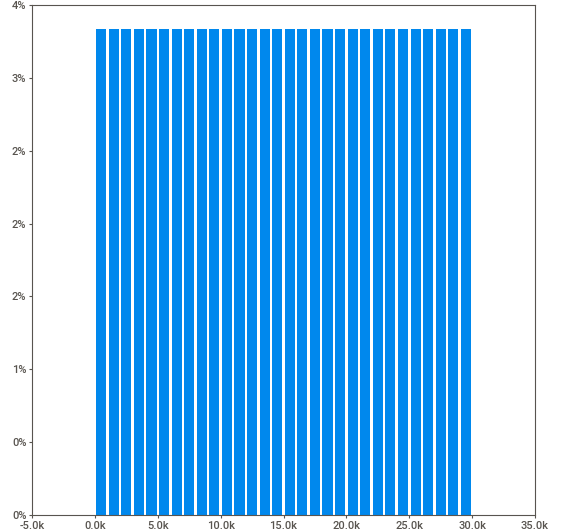
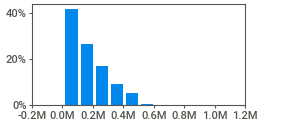
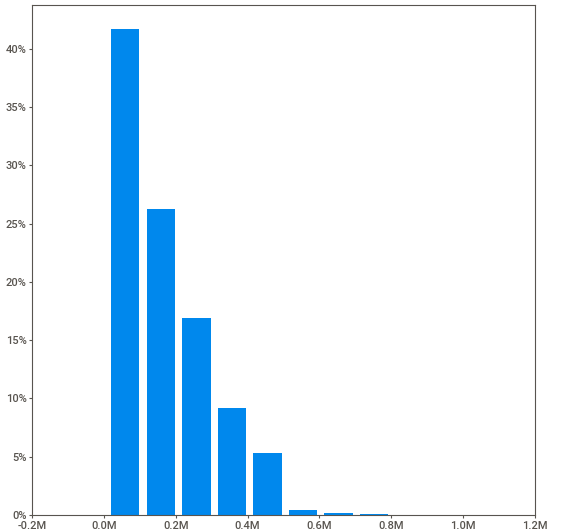
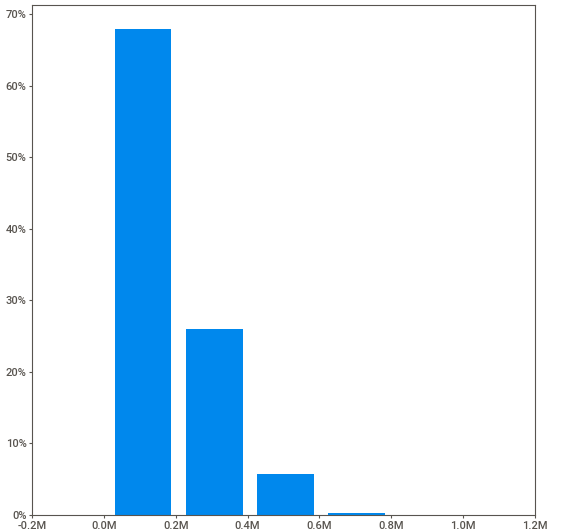
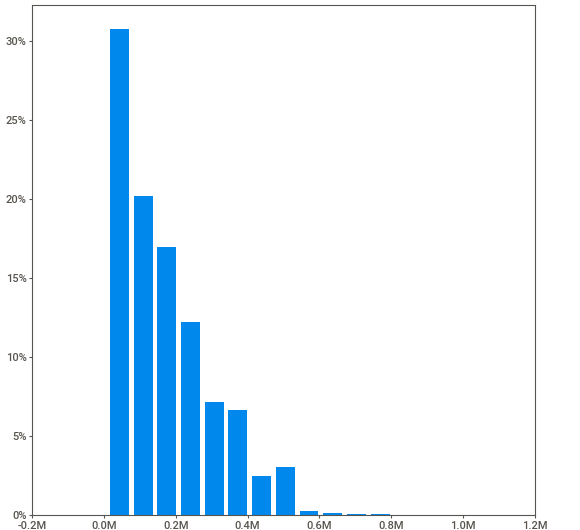
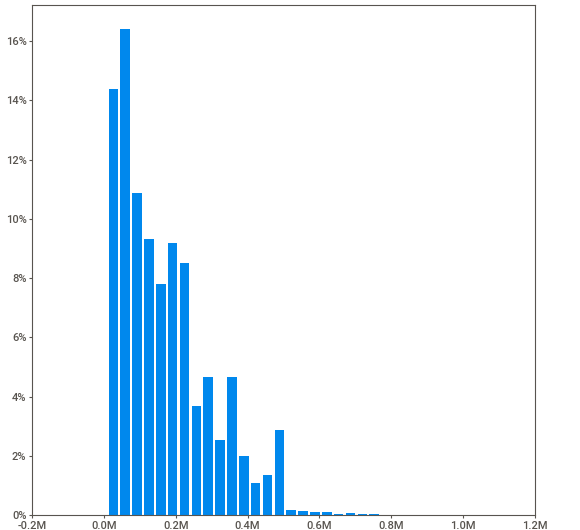
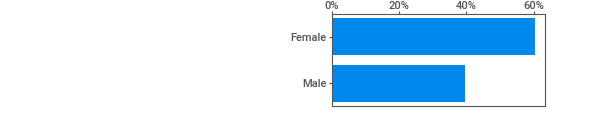
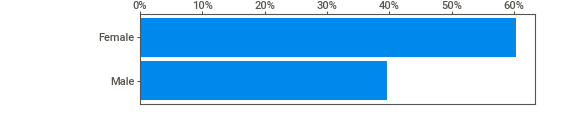
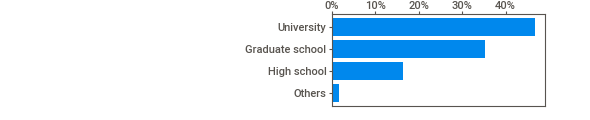
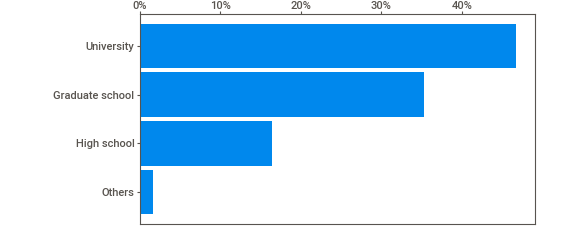
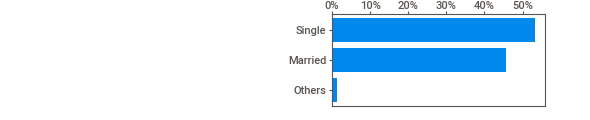
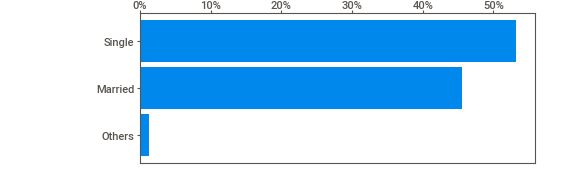
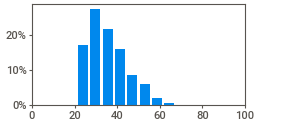
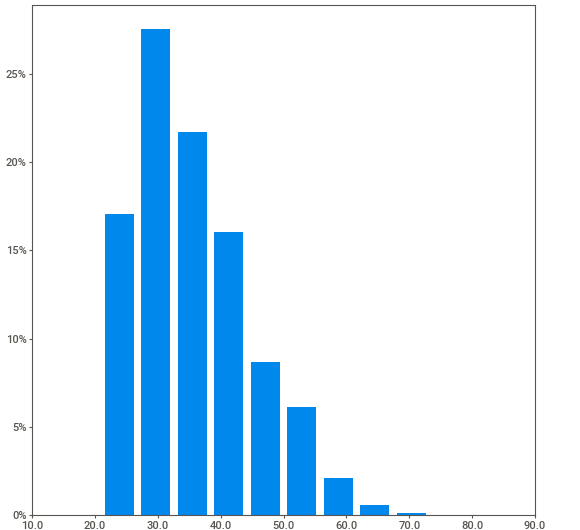
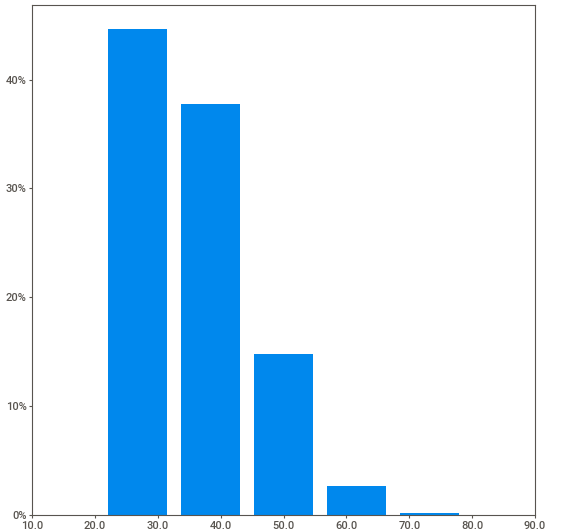
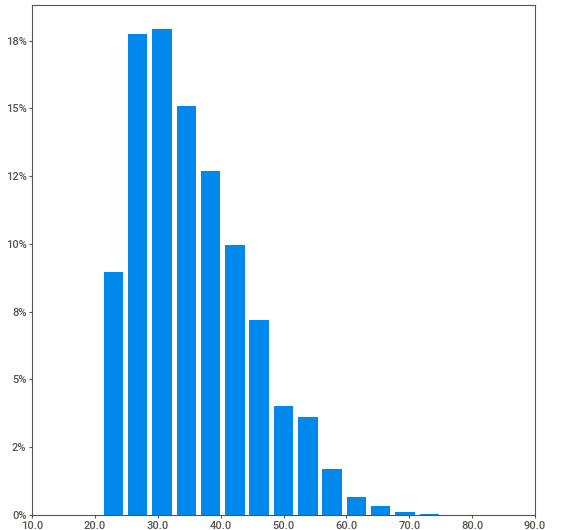
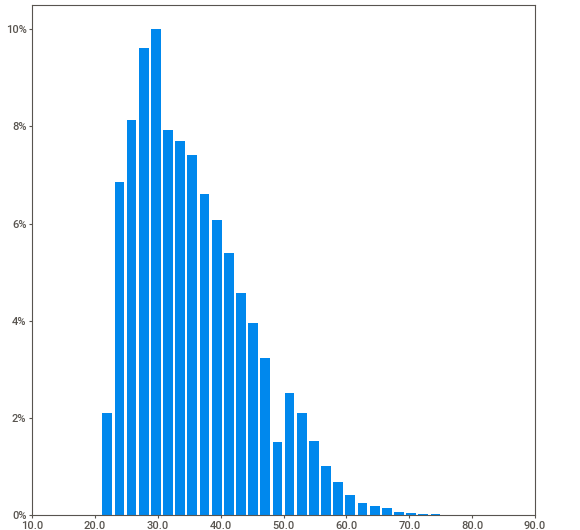
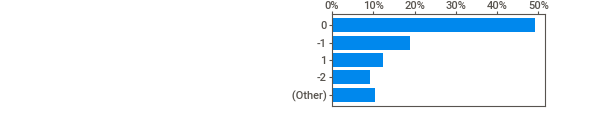
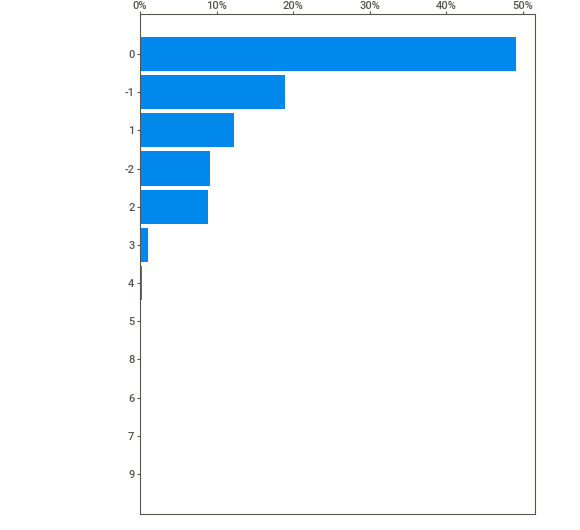
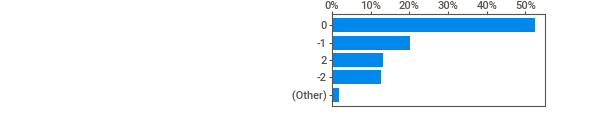
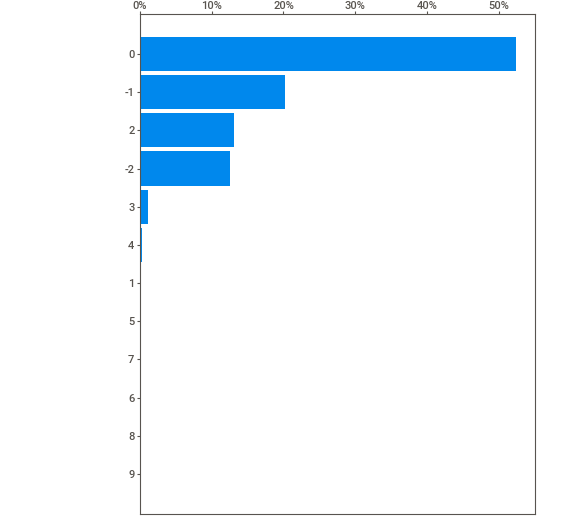
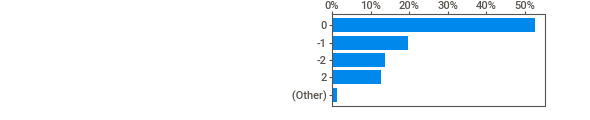
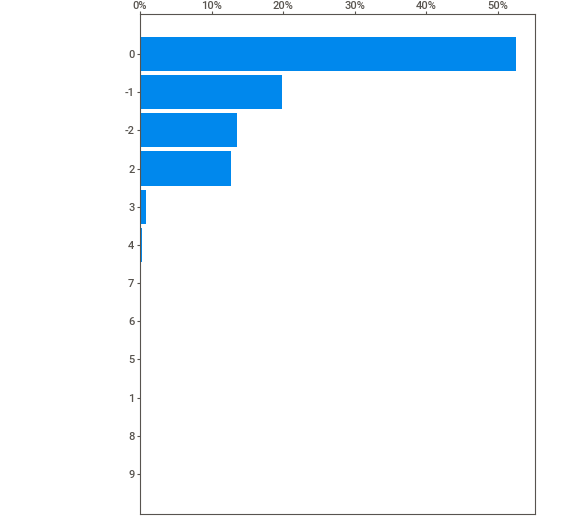
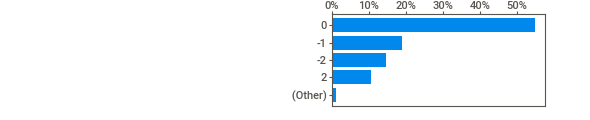
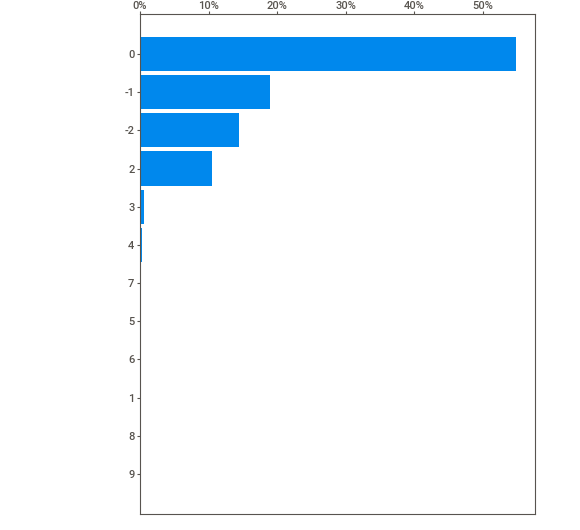
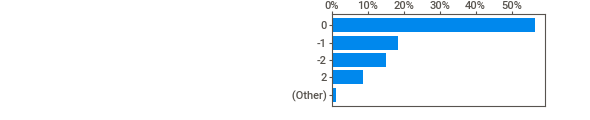
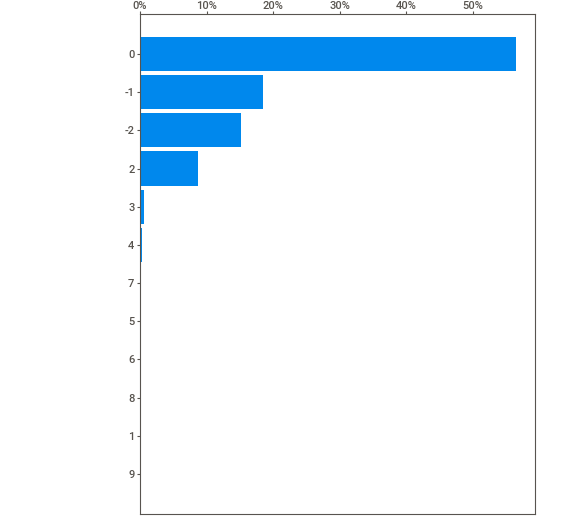
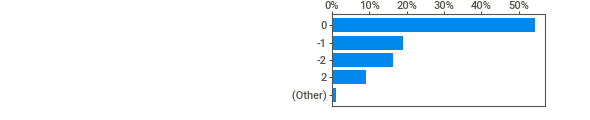
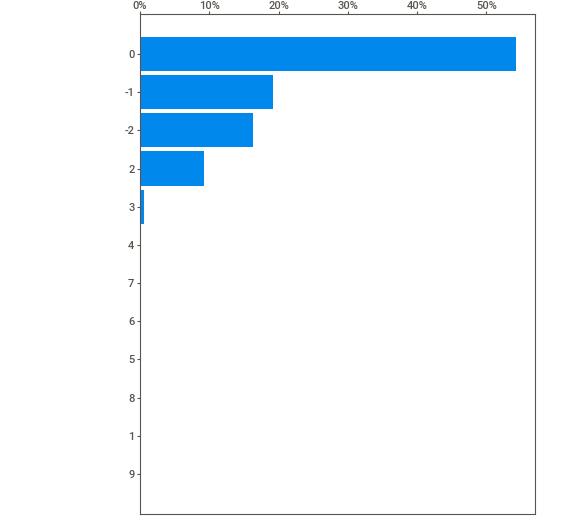
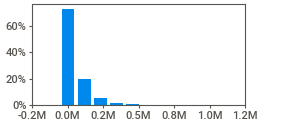
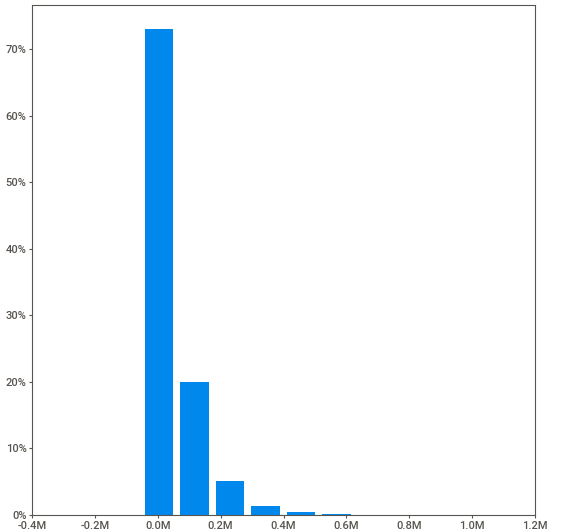
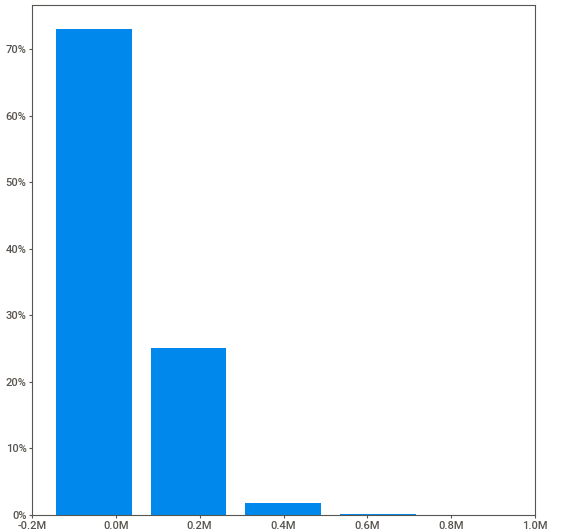
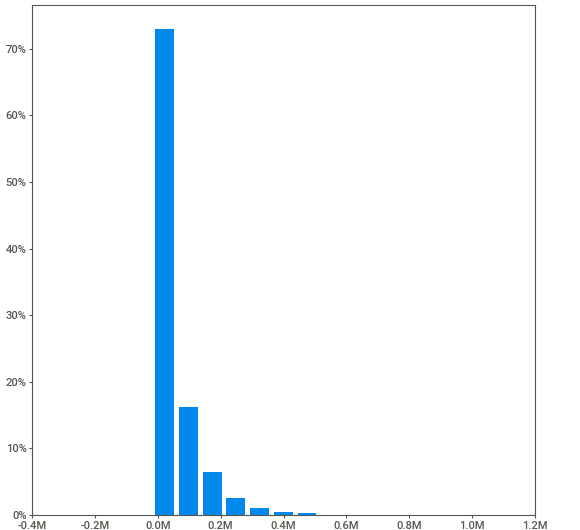
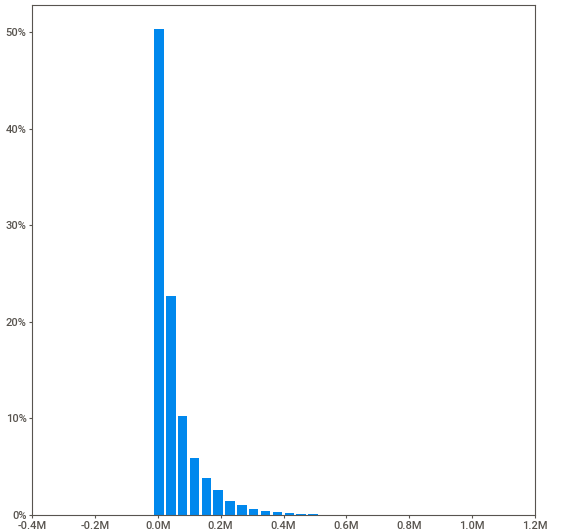
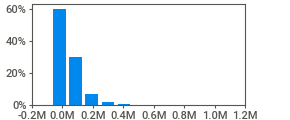
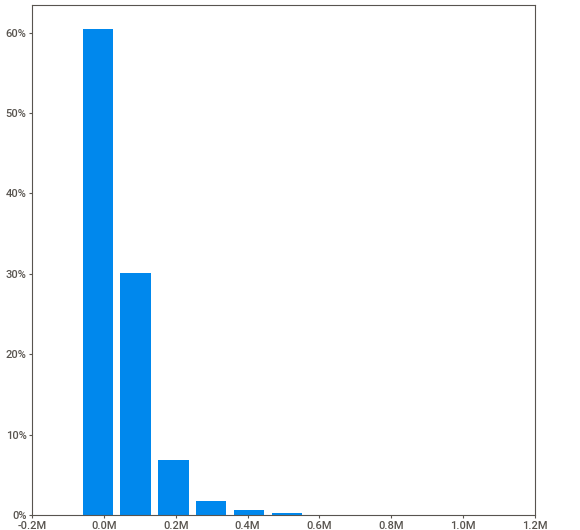
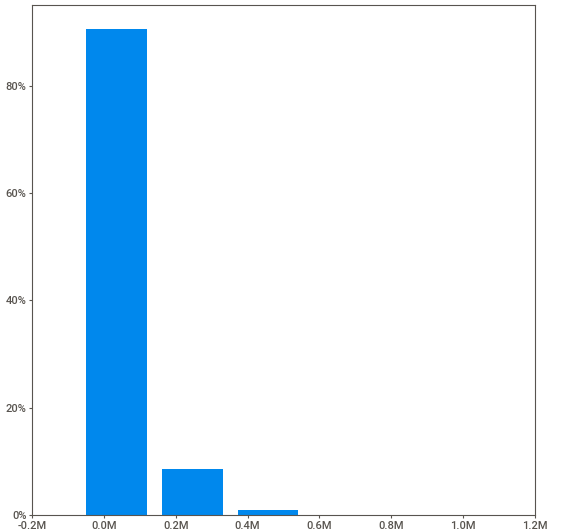
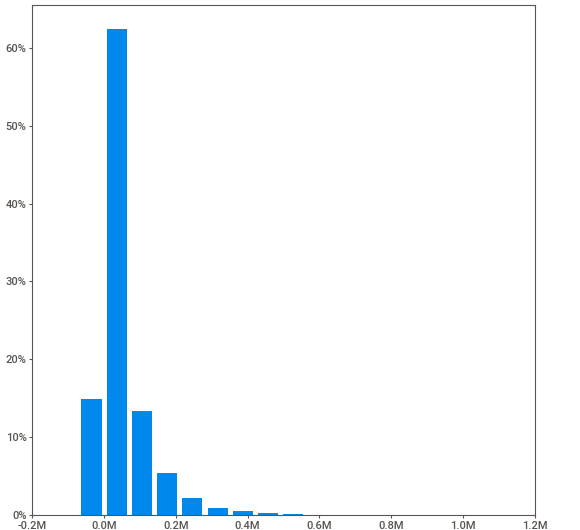
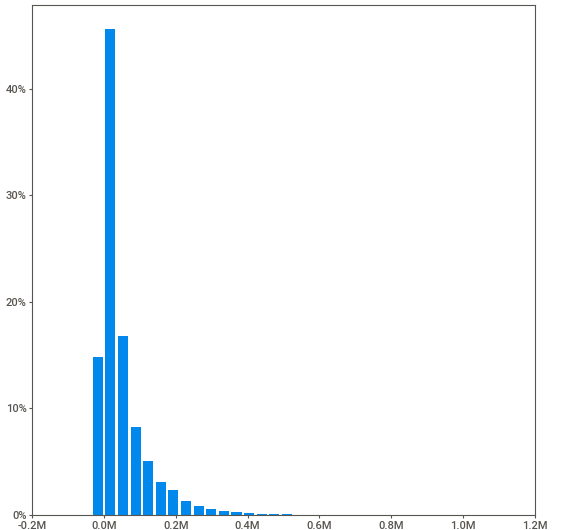
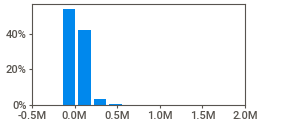
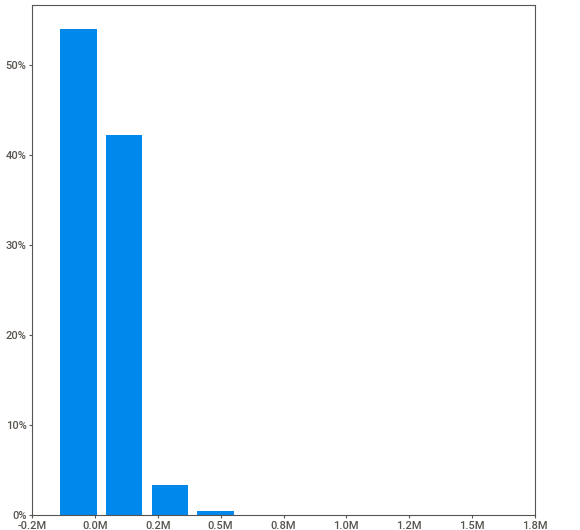
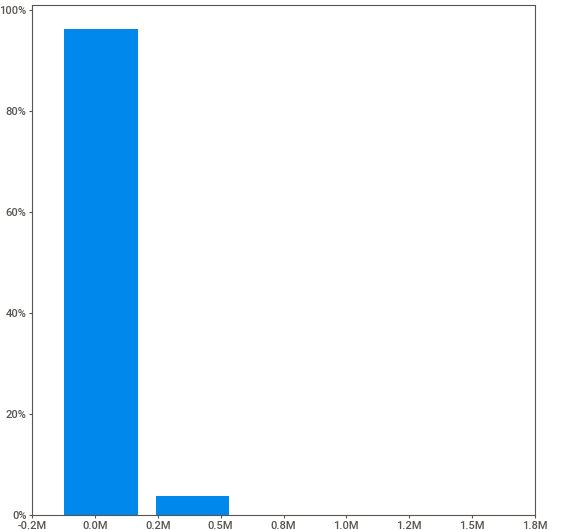
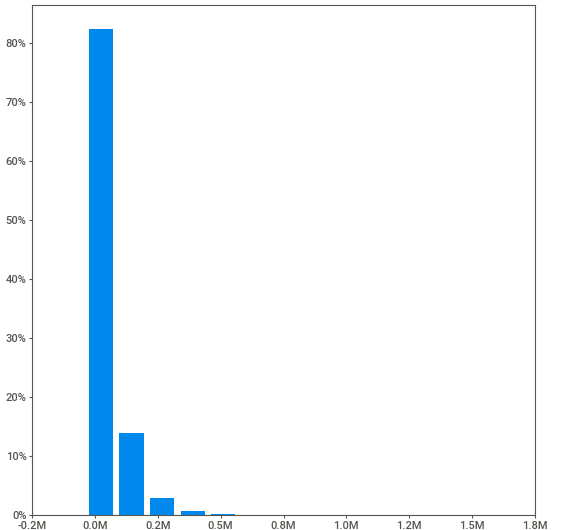
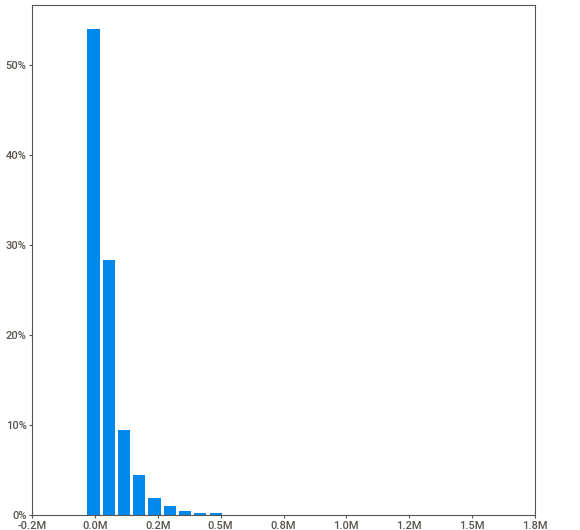
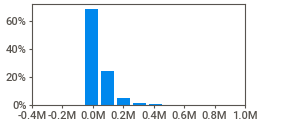
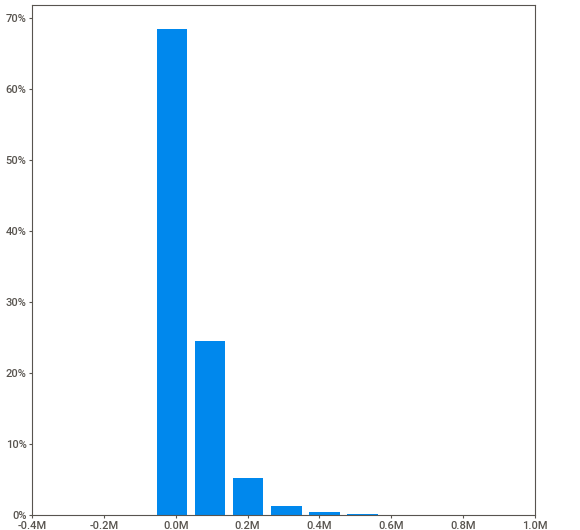
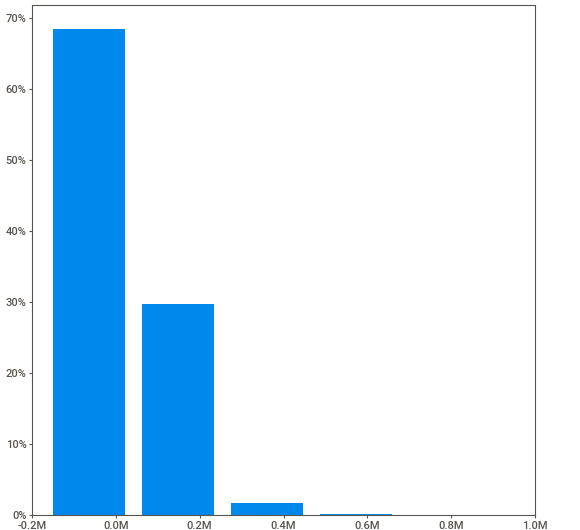
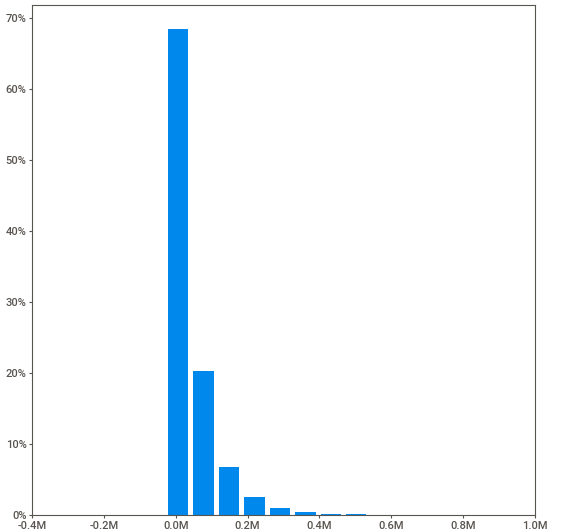
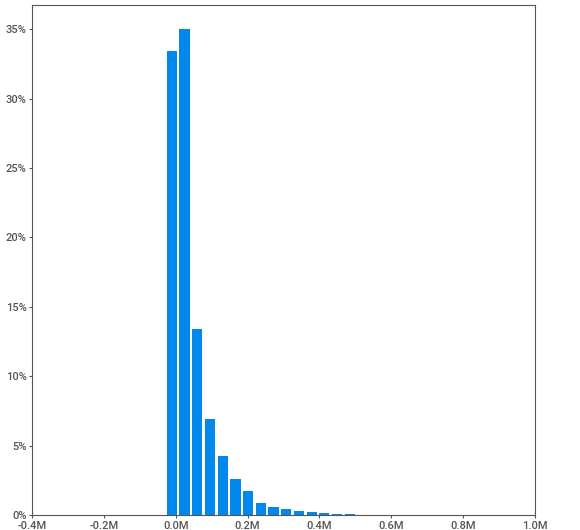
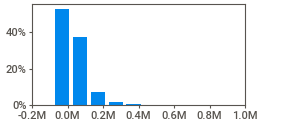
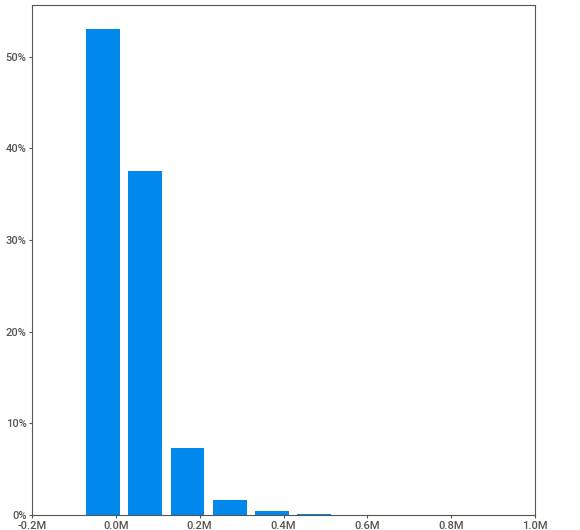
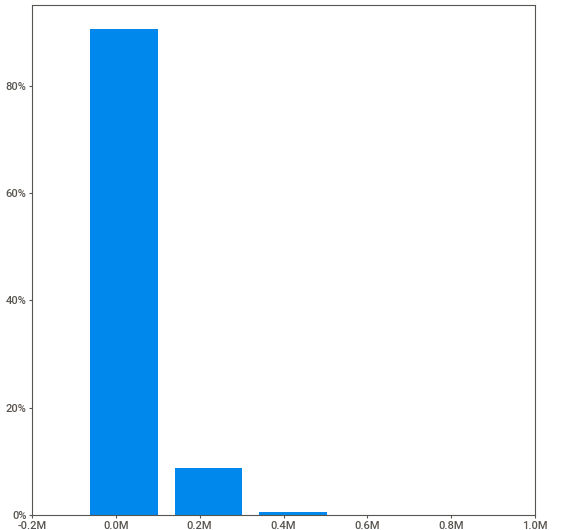
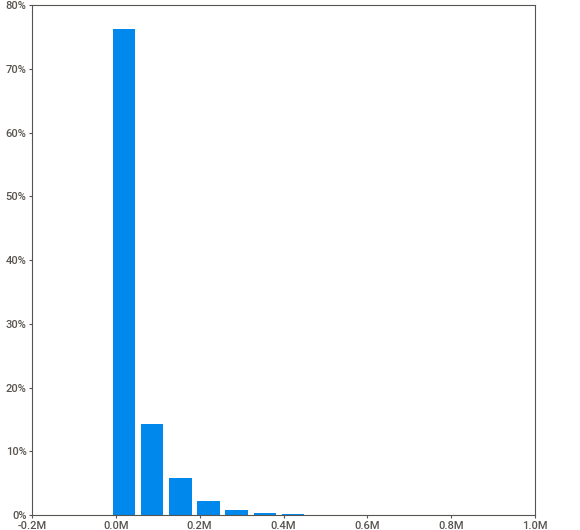
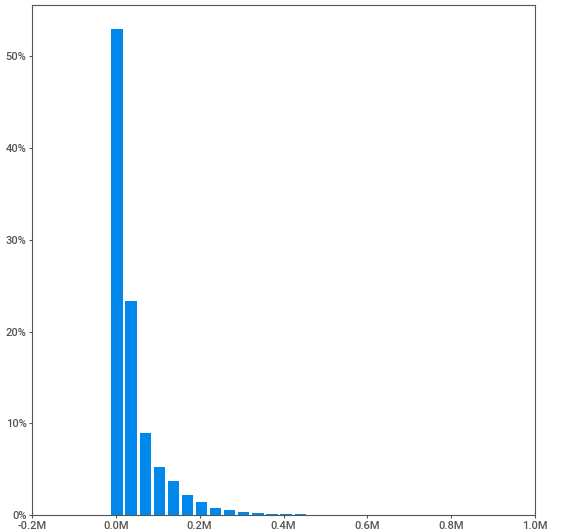
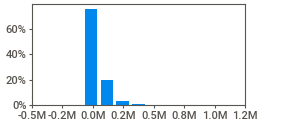
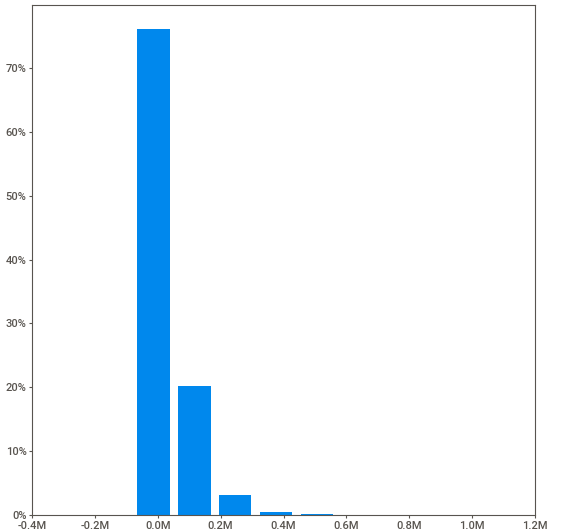
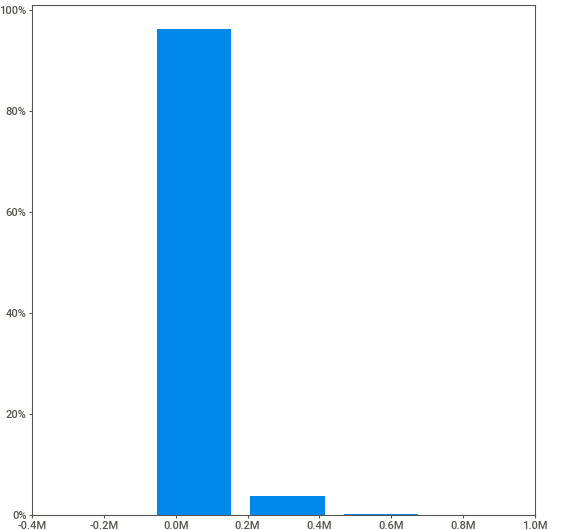
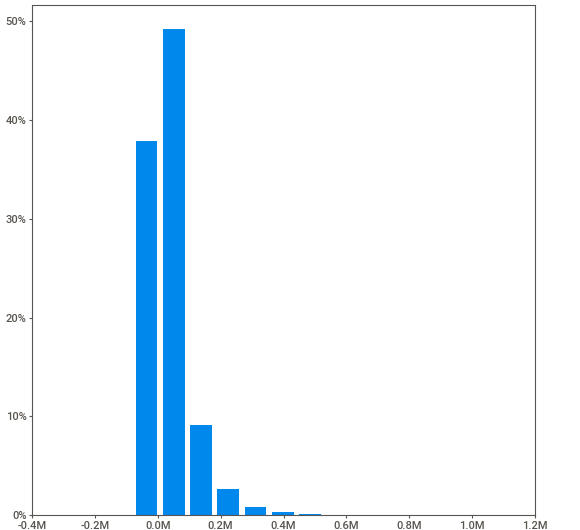
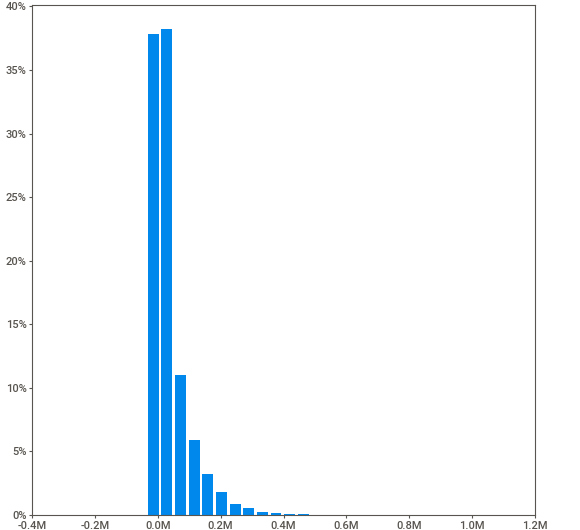
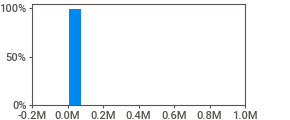
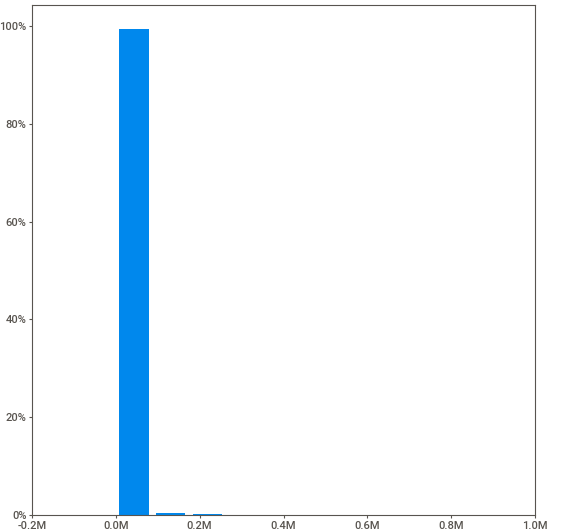
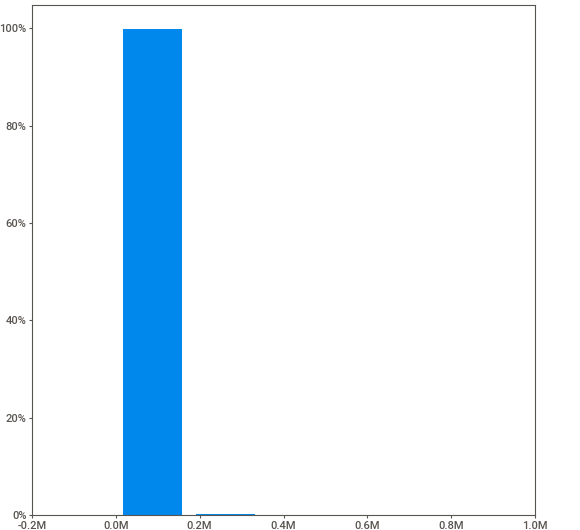
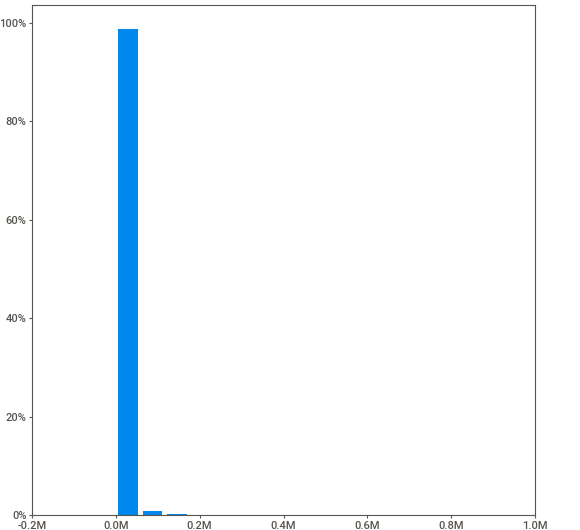
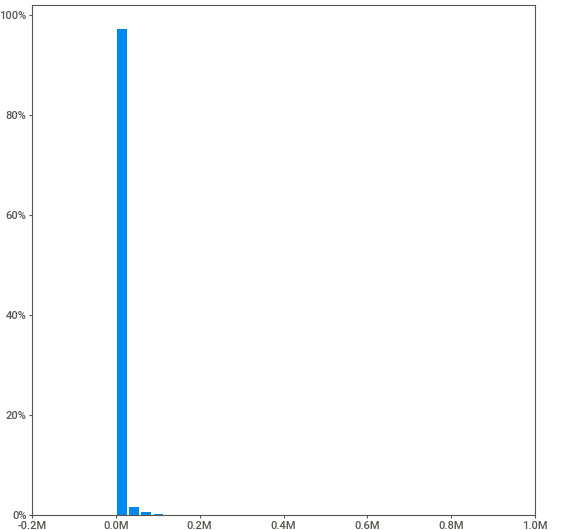
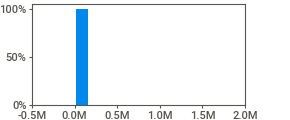
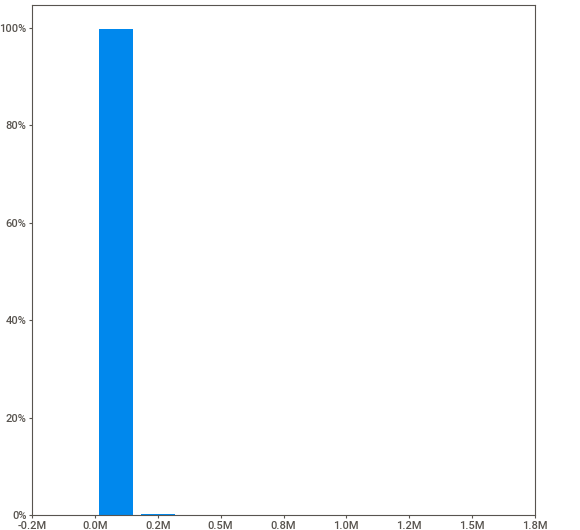
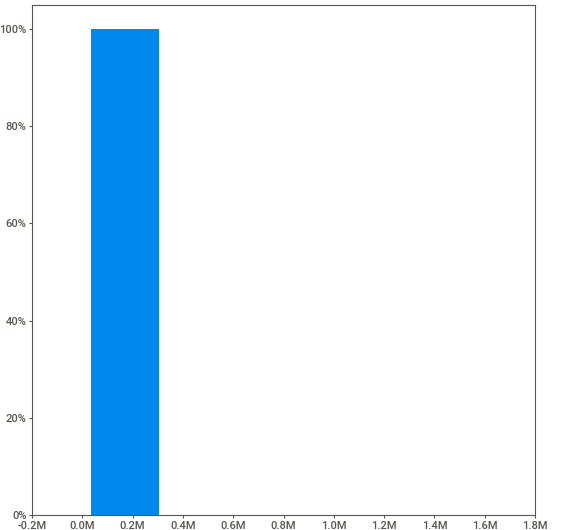
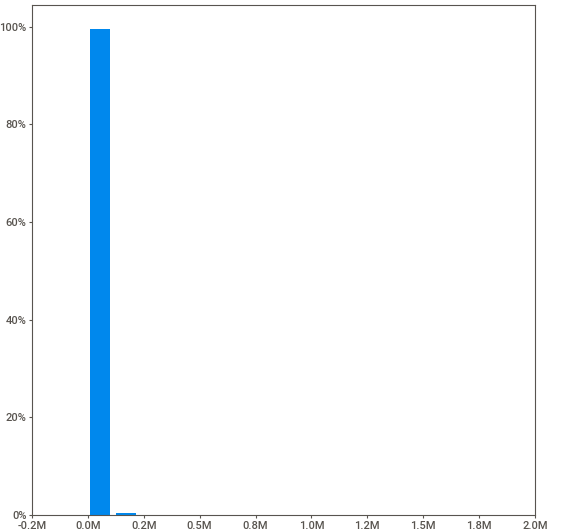
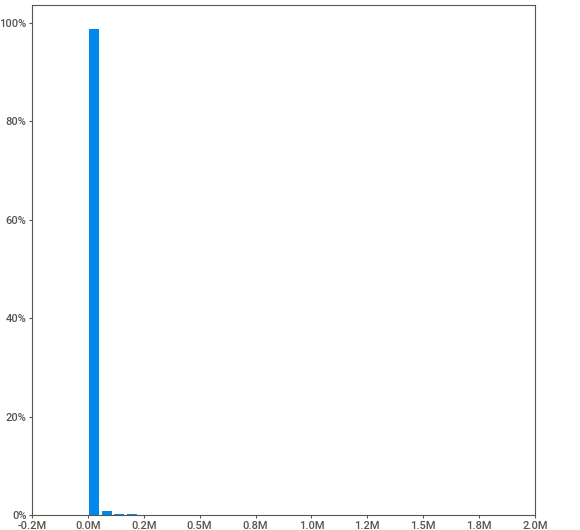
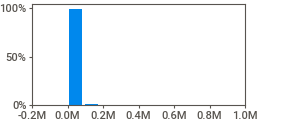
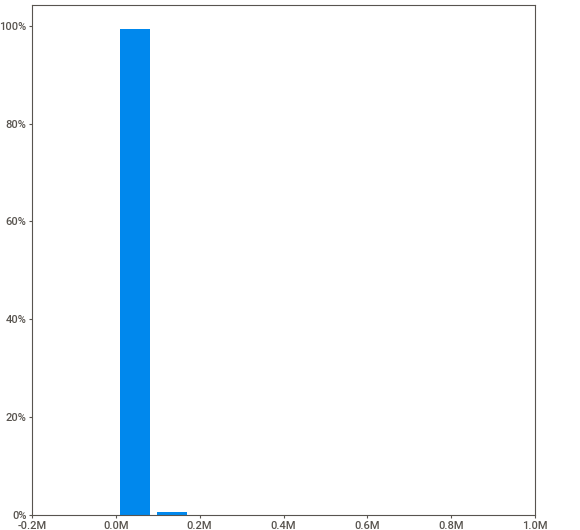
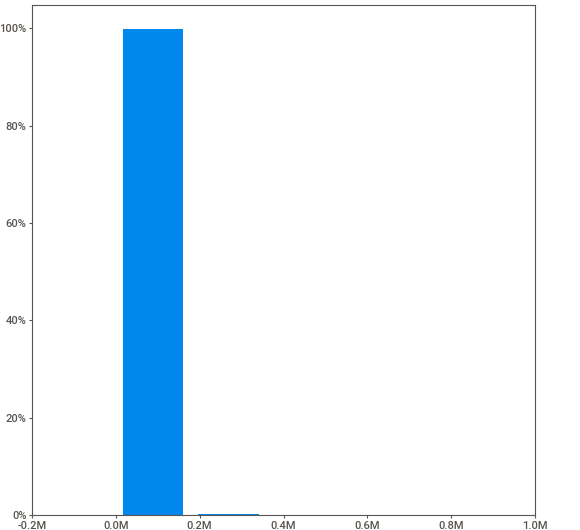
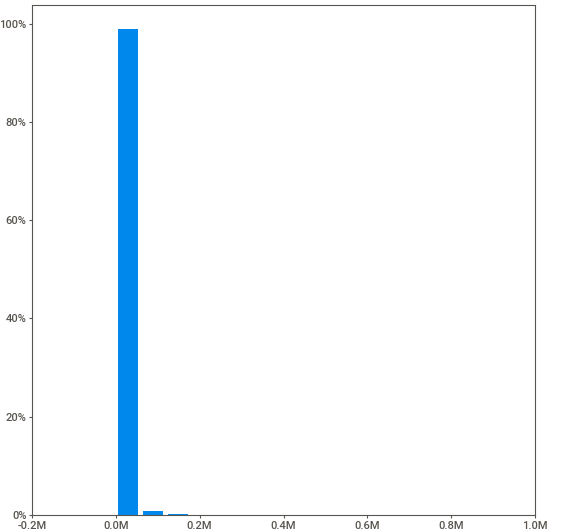
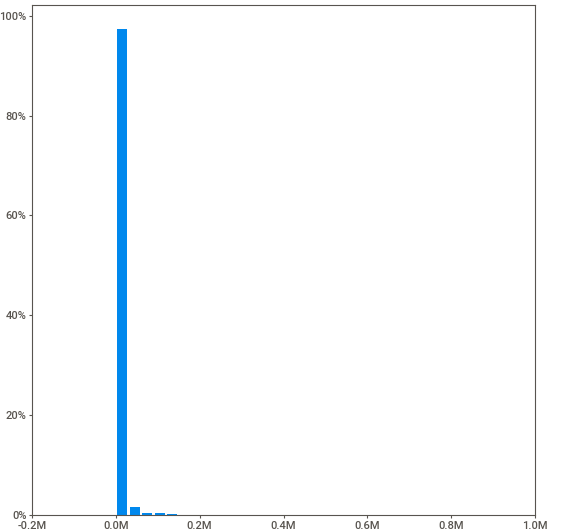
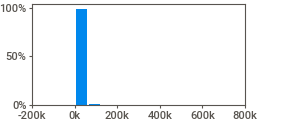
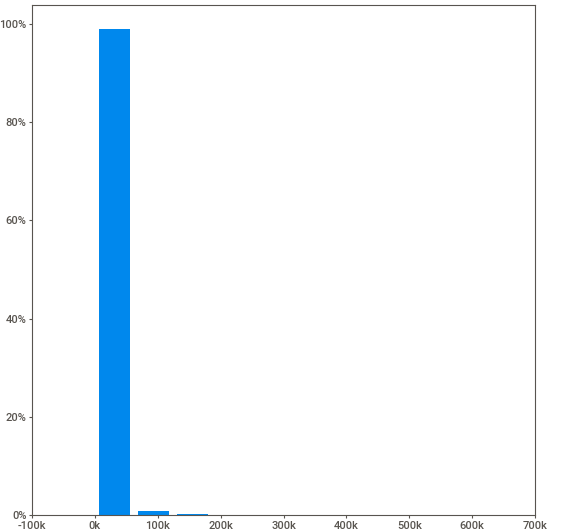
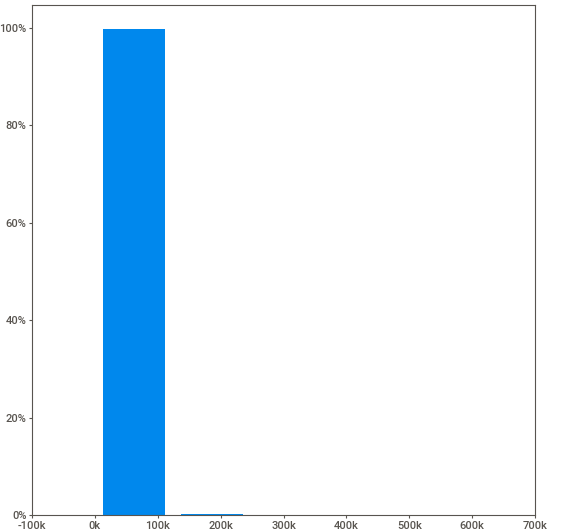
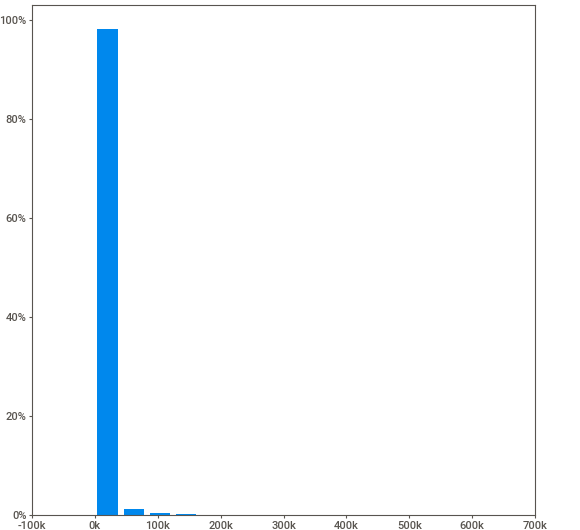
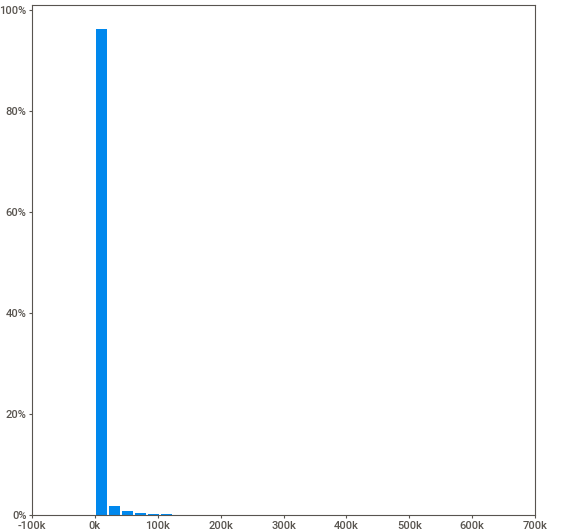
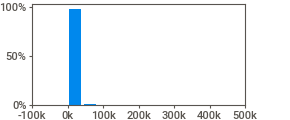
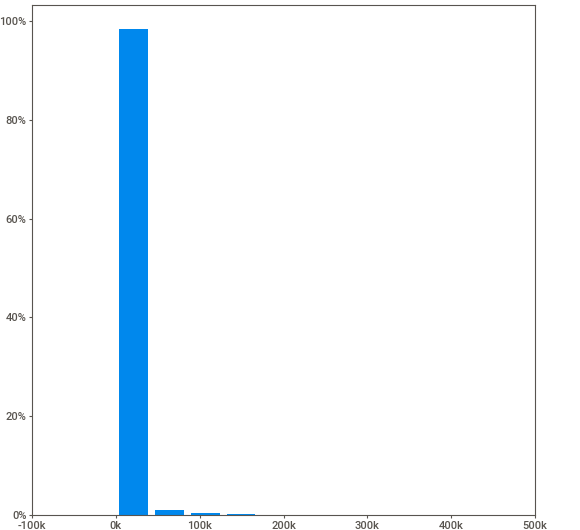
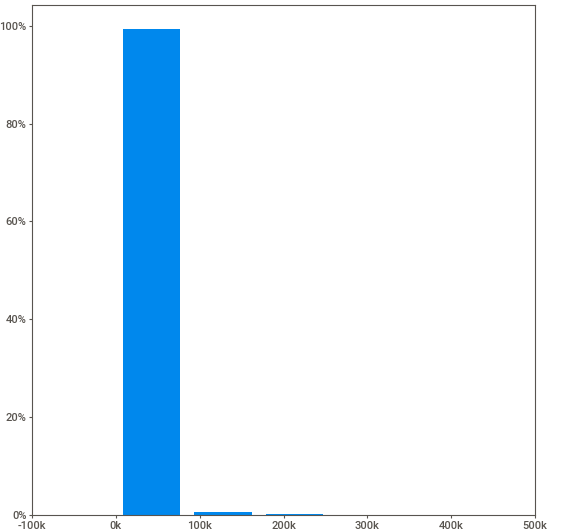
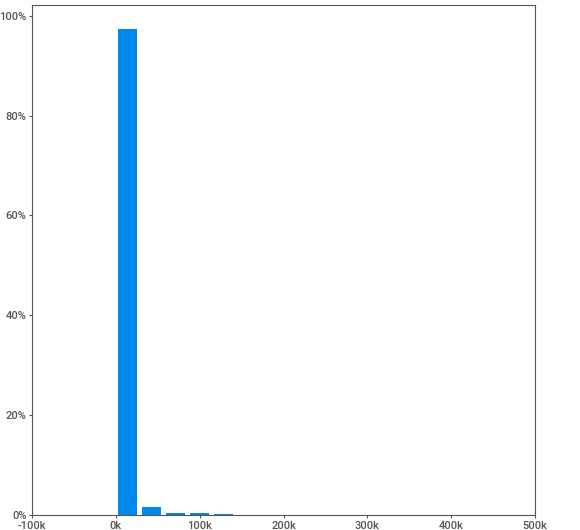
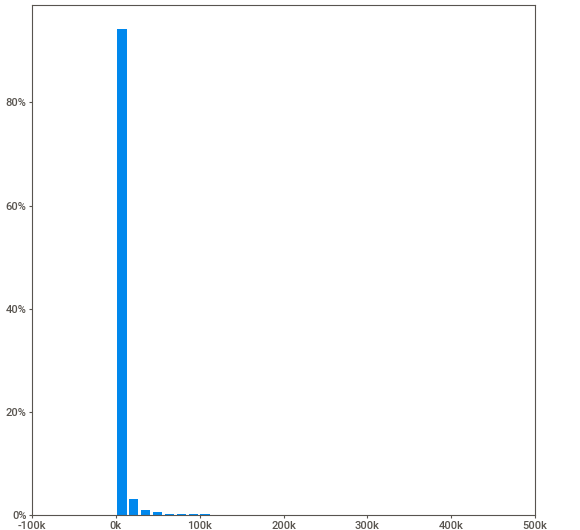
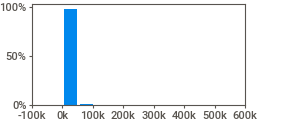
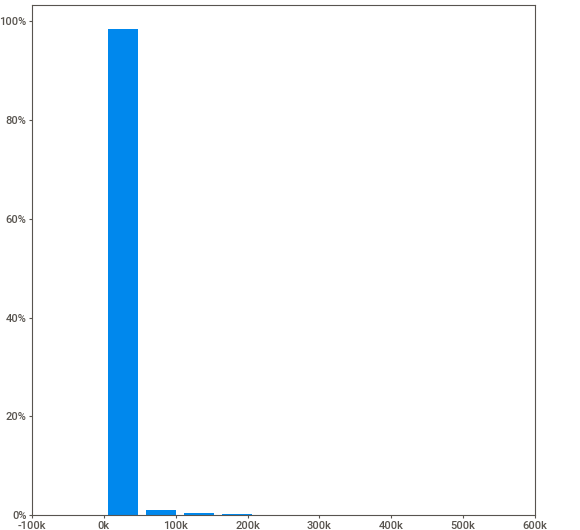
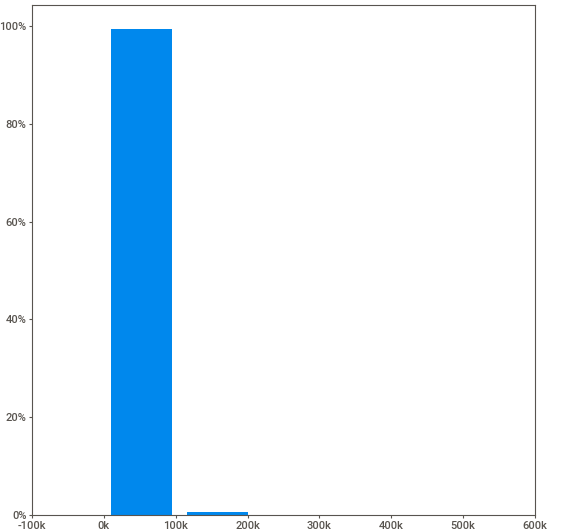
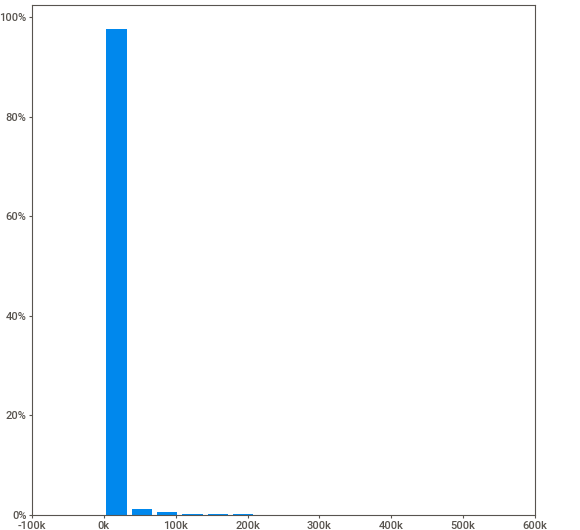
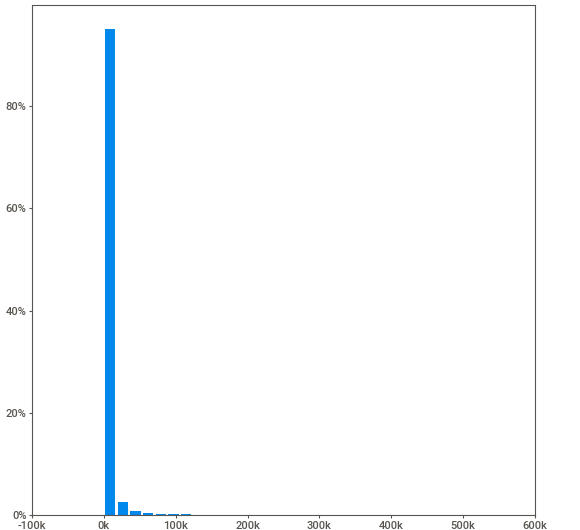
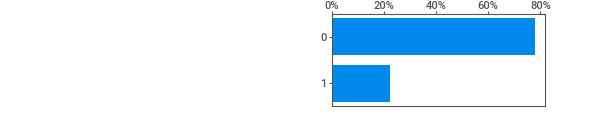
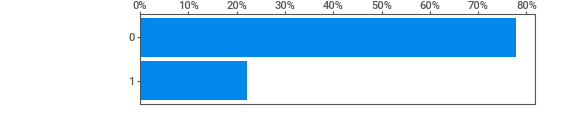
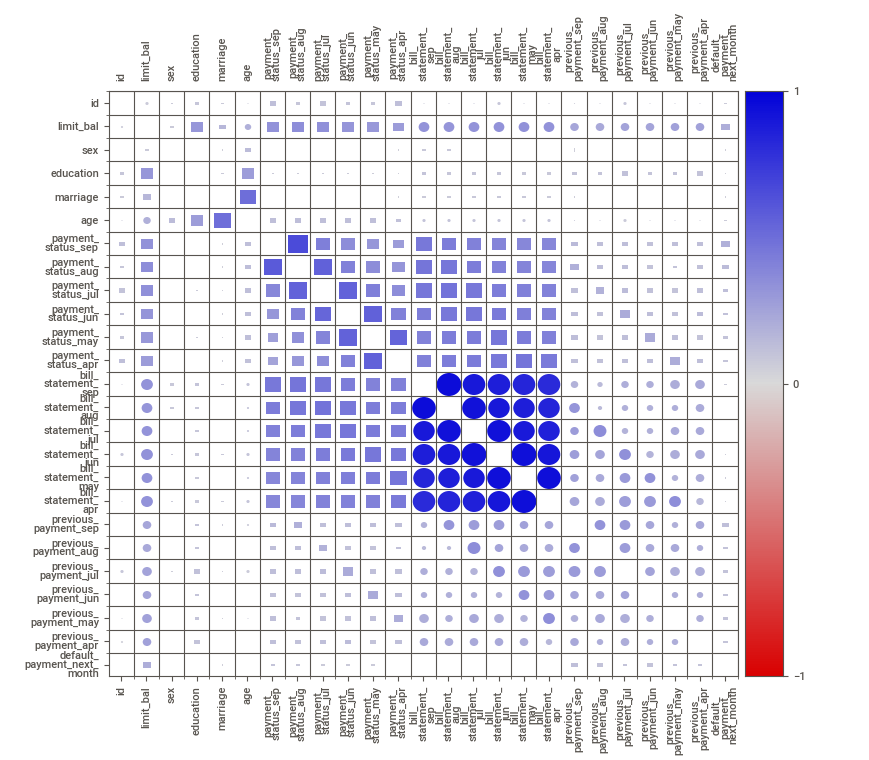
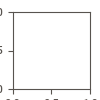

In [ ]:
import sweetviz as sv
#my_report = sv.analyze(df)
#my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
#my_report.show_notebook()

In [20]:
#!pip install sweetviz

### Division des données en 3 ensembles : Entrainement, Validation et Test

Trois ensembles distincts : l'ensemble d'entraînement, l'ensemble de validation et l'ensemble de test. Cette approche est souvent utilisée pour ajuster les hyperparamètres du modèle et évaluer sa performance de manière plus robuste.

In [21]:
# Séparer les caractéristiques (X) de la variable cible (y)
features_df = df.drop(columns=['id', 'default_payment_next_month'])
target_df = df['default_payment_next_month']

# Diviser les données en ensembles d'entraînement, de validation et de test
# Par exemple, 60% pour l'entraînement, 20% pour la validation et 20% pour le test
features_df_train, features_df_temp, target_df_train, target_df_temp = train_test_split(features_df, target_df, test_size=0.4, random_state=42)
features_df_val, features_df_test, target_df_val, target_df_test = train_test_split(features_df_temp, target_df_temp, test_size=0.5, stratify=target_df_temp, random_state=42)

# Afficher la taille des ensembles d'entraînement, de validation et de test
print("Taille de l'ensemble d'entraînement :", features_df_train.shape, target_df_train.shape)
print("Taille de l'ensemble de validation :", features_df_val.shape, target_df_val.shape)
print("Taille de l'ensemble de test :", features_df_test.shape, target_df_test.shape)
print("")
print("Distribution des classes dans chaque ensemble ----")
print(f"Total: {target_df.value_counts(normalize=True).values}")
print(f"Train: {target_df_train.value_counts(normalize=True).values}")
print(f"Valid: {target_df_val.value_counts(normalize=True).values}")
print(f"Test: {target_df_test.value_counts(normalize=True).values}")

Taille de l'ensemble d'entraînement : (18000, 23) (18000,)
Taille de l'ensemble de validation : (6000, 23) (6000,)
Taille de l'ensemble de test : (6000, 23) (6000,)

Distribution des classes dans chaque ensemble ----
Total: [0.7788 0.2212]
Train: [0.77816667 0.22183333]
Valid: [0.77966667 0.22033333]
Test: [0.77983333 0.22016667]


In [22]:
features_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 2758 to 23654
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   limit_bal             18000 non-null  int64   
 1   sex                   18000 non-null  category
 2   education             18000 non-null  category
 3   marriage              18000 non-null  category
 4   age                   18000 non-null  int64   
 5   payment_status_sep    18000 non-null  category
 6   payment_status_aug    18000 non-null  category
 7   payment_status_jul    18000 non-null  category
 8   payment_status_jun    18000 non-null  category
 9   payment_status_may    18000 non-null  category
 10  payment_status_apr    18000 non-null  category
 11  bill_statement_sep    18000 non-null  int64   
 12  bill_statement_aug    18000 non-null  int64   
 13  bill_statement_jul    18000 non-null  int64   
 14  bill_statement_jun    18000 non-null  int64   
 15 

In [23]:
features_df_train.isna().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

### Pipeline de Modélisation

In [24]:
features_df

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,Female,University,Single,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,Female,University,Single,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,Female,University,Married,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,Male,High school,Married,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,Male,High school,Single,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,Male,University,Single,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,Male,High school,Married,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [42]:
features_df_train.dtypes

limit_bal                  int64
sex                     category
education               category
marriage                category
age                        int64
payment_status_sep      category
payment_status_aug      category
payment_status_jul      category
payment_status_jun      category
payment_status_may      category
payment_status_apr      category
bill_statement_sep         int64
bill_statement_aug         int64
bill_statement_jul         int64
bill_statement_jun         int64
bill_statement_may         int64
bill_statement_apr         int64
previous_payment_sep       int64
previous_payment_aug       int64
previous_payment_jul       int64
previous_payment_jun       int64
previous_payment_may       int64
previous_payment_apr       int64
dtype: object

In [44]:
cat_features = ['sex', 'education', 'marriage']

num_features = [c for c in features_df_train.columns if c not in cat_features]
num_features

['limit_bal',
 'age',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr',
 'bill_statement_sep',
 'bill_statement_aug',
 'bill_statement_jul',
 'bill_statement_jun',
 'bill_statement_may',
 'bill_statement_apr',
 'previous_payment_sep',
 'previous_payment_aug',
 'previous_payment_jul',
 'previous_payment_jun',
 'previous_payment_may',
 'previous_payment_apr']

In [45]:
# Création de transformateurs pour les colonnes catégorielles et numériques
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False))  # Utilisation de l'encodage one-hot
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalisation des caractéristiques numériques
])

# Création du transformateur de colonnes en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Création du modèle (dans cet exemple, nous utilisons un RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Création du pipeline complet
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
# Entraînement du modèle en utilisant l'ensemble d'entraînement
pipeline.fit(features_df_train, target_df_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# fonction d Évaluation et de test du model 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)


def performance_model_evaluation(pipeline, features_df_val, target_df_val, labels=["Pas de défaut", "Défaut de paiement"]):
    y_pred = pipeline.predict(features_df_val)
    y_proba = pipeline.predict_proba(features_df_val)[:, 1]

    # Matrice de confusion
    cm = confusion_matrix(target_df_val, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.title("Matrice de confusion")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

    # Rapport global
    print("Rapport de classification :\n")
    print(classification_report(target_df_val, y_pred, target_names=labels))

    # Score ROC AUC
    roc_auc = roc_auc_score(target_df_val, y_proba)
    print(f"ROC AUC : {roc_auc:.3f}")

    # Retourner un dictionnaire des scores
    return {
        "roc_auc": roc_auc,
        "accuracy": accuracy_score(target_df_val, y_pred),
        "precision": precision_score(target_df_val, y_pred),
        "recall": recall_score(target_df_val, y_pred),
        "f1_score": f1_score(target_df_val, y_pred)
    }


In [64]:
# Évaluation sur les données de validation
validation_scores = performance_model_evaluation(
    pipeline, 
    features_df_val, 
    target_df_val, 
    labels=LABELS
)

# Affichage des scores
print("\nScores sur le jeu de validation :")
for metric, value in validation_scores.items():
    print(f"{metric} : {value:.3f}")

 

Rapport de classification :

                    precision    recall  f1-score   support

     Pas de défaut       0.84      0.94      0.89      4678
Défaut de paiement       0.63      0.37      0.47      1322

          accuracy                           0.81      6000
         macro avg       0.74      0.66      0.68      6000
      weighted avg       0.80      0.81      0.80      6000

ROC AUC : 0.771

Scores sur le jeu de validation :
roc_auc : 0.771
accuracy : 0.814
precision : 0.633
recall : 0.374
f1_score : 0.470


In [65]:
# Test final du modèle sur le jeu de test (jamais vu par le modèle)
test_scores = performance_model_evaluation(
    pipeline, 
    features_df_test, 
    target_df_test, 
    labels=LABELS  # même étiquettes que pendant la validation
)

# Affichage des scores sur le test
print("\nScores sur le jeu de test :")
for metric, value in test_scores.items():
    print(f"{metric} : {value:.3f}")


Rapport de classification :

                    precision    recall  f1-score   support

     Pas de défaut       0.84      0.94      0.89      4679
Défaut de paiement       0.64      0.38      0.47      1321

          accuracy                           0.82      6000
         macro avg       0.74      0.66      0.68      6000
      weighted avg       0.80      0.82      0.80      6000

ROC AUC : 0.758

Scores sur le jeu de test :
roc_auc : 0.758
accuracy : 0.816
precision : 0.638
recall : 0.375
f1_score : 0.473
